# Example 1: Coin flipping

In this lab we will consider two data sets collected by the esteemed Professor Mittens and help her interrogate the bais in the results of coin flips.

In [2]:
import pandas as pd
from scipy import stats
import altair as alt
from typing import List, Any, Tuple
from functools import reduce
import math as math

Since we will be working with the binomial distribution, the following function which estimates the probability based on the number of successes in a given number of trials and also a CI for this based on the Wald method will be useful

In [13]:
EstimateAndCI = Tuple[float,Tuple[float,float]]

def wald_estimate_and_ci(num_trials: int, num_success: int) -> EstimateAndCI:
    p_hat = num_success / num_trials
    z = 1.96
    delta = z * math.sqrt(p_hat * (1 - p_hat) / num_trials)
    return (p_hat,(p_hat - delta, p_hat + delta))

## Experiment 1

Professor Mittens asked 15 of her students to each take turns flipping a coin 30 times and recording how many heads they got. She has some suspicions that some of the students did not actually do this properly. We will help Mittens work out whether the coin that was used was fair, i.e. has an equal chance of showing heads or tails.

In [70]:
exp1 = pd.read_csv("experiment1.csv")

In [72]:
head_counts = exp1.drop(columns="flip_number").groupby("name").sum()
head_counts["name"] = head_counts.index.copy()

total_heads = int(head_counts["outcome"].sum())
num_people = int(head_counts["name"].unique().size)
num_flips = int(exp1["name"].value_counts().unique())

head_counts.describe()

,outcome,name
count,15.000000,15.000000
mean,14.800000,7.000000
std,6.710333,4.472136
min,7.000000,0.000000
25%,11.500000,3.500000
50%,13.000000,7.000000
75%,15.500000,10.500000
max,30.000000,14.000000


In [81]:
stats.binom.interval(alpha=0.95,n=30, p = 0.4)

(7.0, 17.0)

In [60]:
wald_estimate_and_ci(num_success=total_heads, 
                     num_trials=num_people * num_flips)

(0.49333333333333335, (0.44713979693549655, 0.5395268697311701))

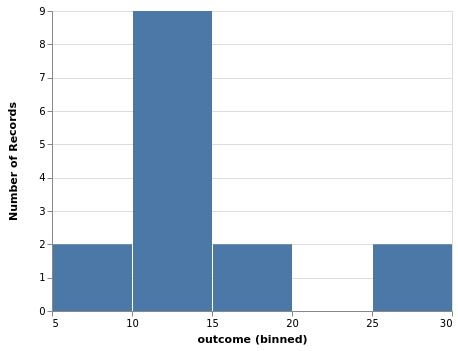

In [61]:
alt.Chart(head_counts).mark_bar().encode(
    alt.X("outcome:Q", bin = True),
    y = 'count()'
)

In [62]:
head_counts_clean = head_counts.loc[head_counts["outcome"] < 30]

total_heads_clean = int(head_counts_clean["outcome"].sum())
num_people_clean = int(head_counts_clean["name"].unique().size)

wald_estimate_and_ci(num_success=total_heads_clean, num_trials=num_people_clean * num_flips)

(0.4153846153846154, (0.3664761437453554, 0.4642930870238754))

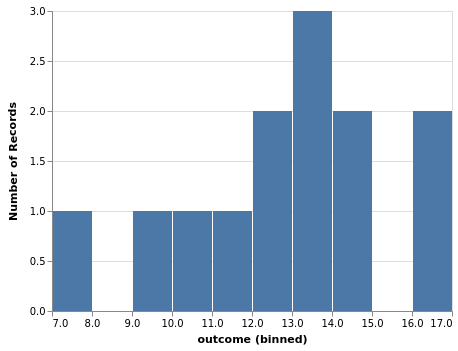

In [63]:
alt.Chart(head_counts_clean).mark_bar().encode(
    alt.X("outcome:Q", bin = True),
    y = 'count()'
)

## Experiment 2

After the success of her first experiment, Mittens was awarded funds to obtain a further 14 coins and repeat the experiment to gather more data about the fascinating topic of coin bias. Now she gives each of the 15 students a coin each and asks them to flip the coin 30 times and record the results. We will help Mittens work out whether the coins are fair.

In [86]:
exp2 = pd.read_csv("experiment2.csv")

head_counts = exp2.drop(columns="flip_number").groupby("name").sum()
head_counts["name"] = head_counts.index.copy()

total_heads = int(head_counts["outcome"].sum())
num_people = int(head_counts["name"].unique().size)
num_flips = int(exp1["name"].value_counts().unique())

wald_estimate = wald_estimate_and_ci(num_success=total_heads, 
                                     num_trials=num_people * num_flips)

print(wald_estimate)

(0.4111111111111111, (0.36564936608706916, 0.456572856135153))


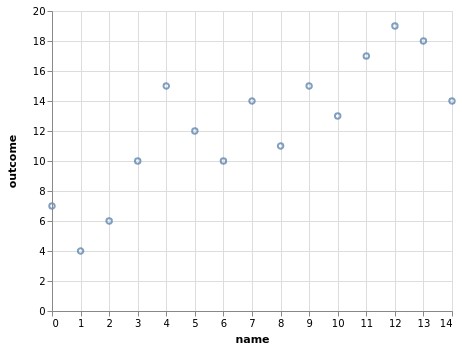

In [74]:
alt.Chart(head_counts).mark_point().encode(
    x = "name",
    y = 'outcome'
)

In [75]:
30 * 0.4 * 0.6

7.199999999999999

In [83]:
head_counts["outcome"].var()

19.23809523809524

In [92]:
stats.binom.var(n = num_flips, p = wald_estimate[0])

7.262962962962963